## Sentiment analysis based on Naive Bayes with TF-IDF

In [1]:
import joblib
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [2]:
import sys
sys.path.append('../utils') 
from dataset_split_tfidf import load_and_split_data

# Load the data
X_train, X_test, y_train, y_test = load_and_split_data()


In [3]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# predict
y_pred = nb_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))


# Save the model
joblib.dump(nb_model, './tfidf_models/nb_model.pkl')

Accuracy: 0.6092369477911647
              precision    recall  f1-score   support

    negative       0.65      0.38      0.48      8259
     neutral       0.58      0.79      0.67     17169
    positive       0.66      0.51      0.57     11922

    accuracy                           0.61     37350
   macro avg       0.63      0.56      0.57     37350
weighted avg       0.62      0.61      0.60     37350



['./tfidf_models/nb_model.pkl']

## Draw result

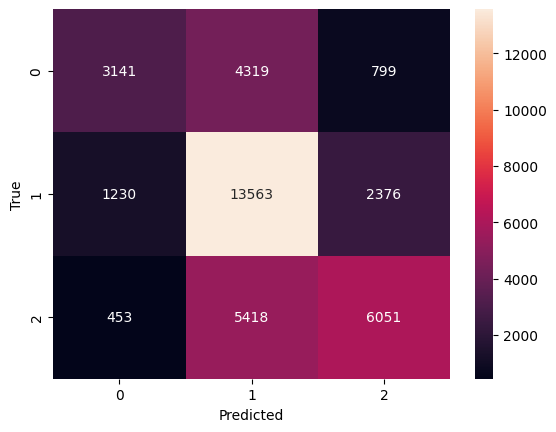

In [4]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()